In [1]:
#Data Analysis Libraries
import pandas as pd
import numpy as np

In [2]:
#Data visualization libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('Classified Data',index_col=0)

In [6]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [18]:
df_scaled_features = pd.DataFrame(scaled_features , columns= df.columns[:-1])

In [19]:
df_scaled_features

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [36]:
from sklearn.model_selection import train_test_split
X = df_scaled_features
y = df['TARGET CLASS']

In [37]:
X_train, X_test,y_train,y_test = train_test_split(X , y, train_size=0.30 , random_state = 101)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [39]:
predictions = knn.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       339
           1       0.91      0.89      0.90       361

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700



In [34]:
#to increase the accuracy rate ,find optimum value of K

In [42]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    error_rate.append(np.mean(predict!=y_test))
    

In [43]:
error_rate

[0.10142857142857142,
 0.1,
 0.07,
 0.07857142857142857,
 0.06714285714285714,
 0.07428571428571429,
 0.06285714285714286,
 0.07285714285714286,
 0.06142857142857143,
 0.06571428571428571,
 0.06285714285714286,
 0.06,
 0.06285714285714286,
 0.06571428571428571,
 0.06857142857142857,
 0.06571428571428571,
 0.06428571428571428,
 0.06714285714285714,
 0.06571428571428571,
 0.06428571428571428,
 0.06142857142857143,
 0.06428571428571428,
 0.06142857142857143,
 0.06714285714285714,
 0.06285714285714286,
 0.06,
 0.06,
 0.05285714285714286,
 0.05857142857142857,
 0.05714285714285714,
 0.05714285714285714,
 0.06,
 0.05857142857142857,
 0.05714285714285714,
 0.06,
 0.05857142857142857,
 0.05857142857142857,
 0.05857142857142857,
 0.06,
 0.05714285714285714,
 0.05714285714285714,
 0.05857142857142857,
 0.05714285714285714,
 0.05714285714285714,
 0.05857142857142857,
 0.05714285714285714,
 0.05857142857142857,
 0.06142857142857143,
 0.06]

Text(0.5, 1.0, 'ERROR RATE')

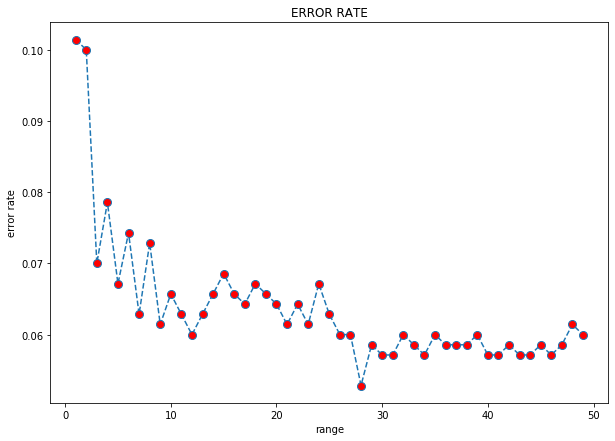

In [48]:
plt.figure(figsize=(10,7))
plt.plot(range(1,50),error_rate , linestyle='--',marker = 'o',markerfacecolor='red',markersize=8)
plt.xlabel('range')
plt.ylabel('error rate')
plt.title('ERROR RATE')

In [49]:
#at k=28 , error_rate is minimum

In [50]:
knn = KNeighborsClassifier(n_neighbors=28)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [52]:
predict = knn.predict(X_test)

In [54]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       339
           1       0.95      0.94      0.95       361

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700

[[322  17]
 [ 20 341]]
